# Smart Meters

In this example, we use several datasets to predict users' electricity consumption. You can download the Jupyter Notebook of the study <a href="smart_meters.ipynb">here</a>. We'll use the following datasets:

<a href="../../data/smart_meters/sm_consumption.csv">sm_consumption</a>
<ul class="ul_content">
    <li><b>dateUTC: </b>Date and time of the record</li>
    <li><b>meterID: </b>Smart meter ID</li>
    <li><b>value: </b>Smart meter consumption</li>
</ul>

<a href="../../data/smart_meters/sm_weather.csv">sm_weather</a>
<ul class="ul_content">
    <li><b>dateUTC: </b>Date and time of the record</li>
    <li><b>temperature: </b>Temperature</li>
    <li><b>humidity: </b>Humidity</li>
</ul>

<a href="../../data/smart_meters/sm_meters.csv">sm_meters</a>
<ul class="ul_content">
    <li><b>longitude: </b>Longitude</li>
    <li><b>latitude: </b>Latitude</li>
    <li><b>residenceType: </b>1 for Single-Family; 2 for Multi-Family; 3 for Appartement</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

Let's create the Virtual DataFrames of the datasets.

In [1]:
from verticapy.connections.connect import *
new_auto_connection({"host": "192.168.56.201", 
                     "port": "5433", 
                     "database": "dw", 
                     "password": "vertica_4U", 
                     "user": "dbadmin"},
                    name = "VerticaDSN")
change_auto_connection("VerticaDSN")

,123meterIDInt,📅dateUTCTimestamp,"123valueNumeric(10,6)"
1,0,2014-01-01 11:00:00,0.029
2,0,2014-01-01 13:45:00,0.277
3,0,2014-01-02 10:45:00,0.321
4,0,2014-01-02 11:15:00,0.305
5,0,2014-01-02 13:45:00,0.358
6,0,2014-01-02 15:30:00,0.115
7,0,2014-01-03 08:30:00,0.071
8,0,2014-01-04 23:45:00,0.323
9,0,2014-01-06 01:15:00,0.085
10,0,2014-01-06 21:45:00,0.713

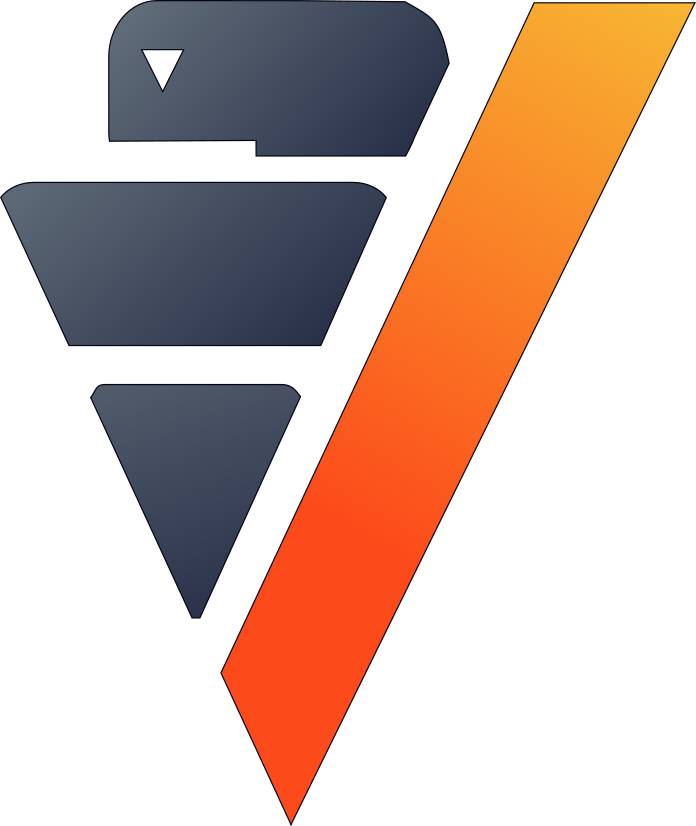

,📅dateUTCTimestamp,"123temperatureNumeric(10,6)","123humidityNumeric(11,6)"
1,2014-01-01 00:00:00,38.0,95.0
2,2014-01-01 00:30:00,37.4,93.0
3,2014-01-01 01:00:00,37.4,100.0
4,2014-01-01 01:30:00,37.4,100.0
5,2014-01-01 02:00:00,39.2,93.0
6,2014-01-01 02:30:00,39.2,93.0
7,2014-01-01 03:00:00,39.2,93.0
8,2014-01-01 03:30:00,39.2,93.0
9,2014-01-01 04:00:00,39.2,93.0
10,2014-01-01 04:30:00,39.2,93.0

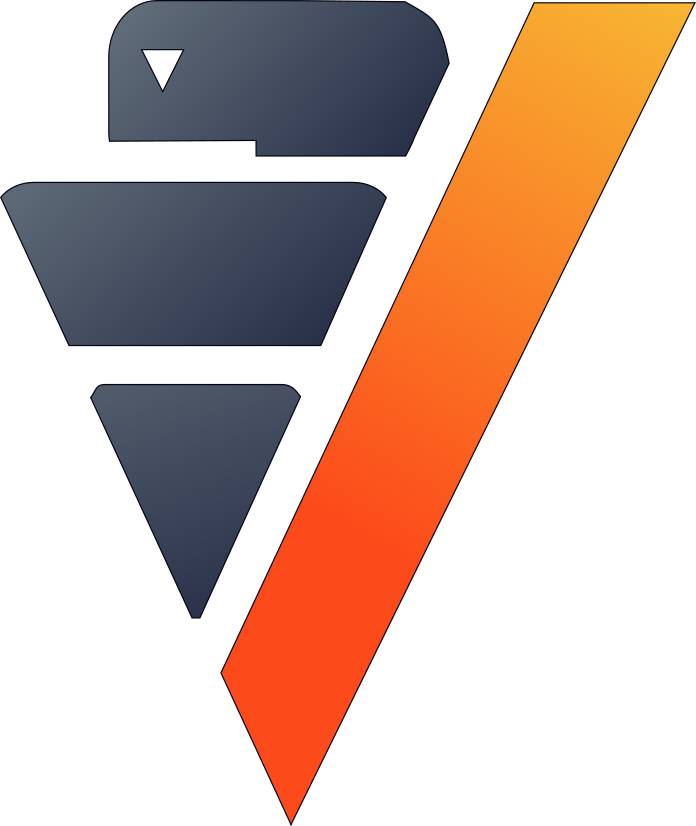

,123meterIDInt,123residenceTypeInt,🌎latitudeFloat,🌎longitudeFloat
1,0,1,53.3575915882838,-6.27554509198069
2,1,1,53.3130886440828,-6.21174062227953
3,2,1,53.322863954253,-6.25885396251447
4,3,3,51.895226209818,-8.54531304761961
5,4,1,53.6511753623331,-6.69348712237822
6,5,1,53.3262233045899,-6.31623713317817
7,6,3,53.3816401612885,-6.24222877491921
8,7,3,53.4410265504271,-6.2749868845315
9,8,1,53.2883538726462,-6.31547263281076
10,9,1,53.307294775666,-6.171585396401

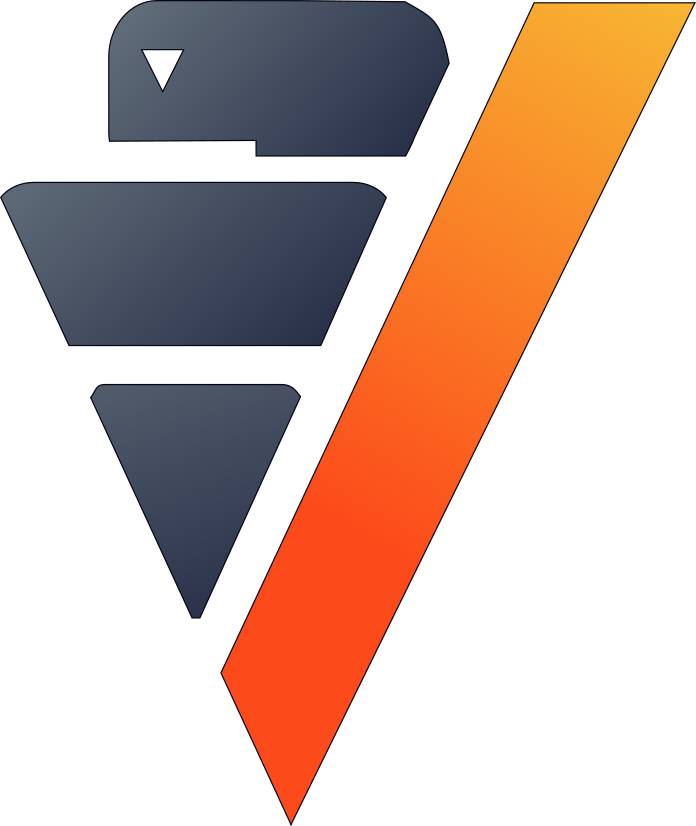

In [2]:
from verticapy import *
import verticapy.stats as st
sm_consumption = vDataFrame("sm_consumption")
sm_weather = vDataFrame("sm_weather")
sm_meters = vDataFrame("sm_meters")
display(sm_consumption)
display(sm_weather)
display(sm_meters)

## Data Exploration and Preparation

Predicting energy consumption in households is very important; if too many people are using too much electricity at once, it could cause a power outage. In our case, we'll be using our data on general household energy consumption in Ireland.

In order to join the different data sources, we need to assume that the weather will be approximately the same in the entire Ireland. The key to join 'sm_weather' and 'sm_consumption' will be the date and time. 

In VerticaPy, it is possible to do interpolate joins. Vertica will find the closest timestamp to the key and join the result.

,📅dateUTCTimestamp,123meterIDInt,"123valueNumeric(10,6)","123humidityNumeric(11,6)","123temperatureNumeric(10,6)"
1,2014-01-01 00:00:00,913,0.097,95.0,38.0
2,2014-01-01 00:00:00,895,0.184,95.0,38.0
3,2014-01-01 00:00:00,795,0.093,95.0,38.0
4,2014-01-01 00:00:00,780,0.116,95.0,38.0
5,2014-01-01 00:00:00,747,0.559,95.0,38.0
6,2014-01-01 00:00:00,660,0.836,95.0,38.0
7,2014-01-01 00:00:00,640,1.796,95.0,38.0
8,2014-01-01 00:00:00,605,0.038,95.0,38.0
9,2014-01-01 00:00:00,484,0.211,95.0,38.0
10,2014-01-01 00:00:00,474,0.313,95.0,38.0

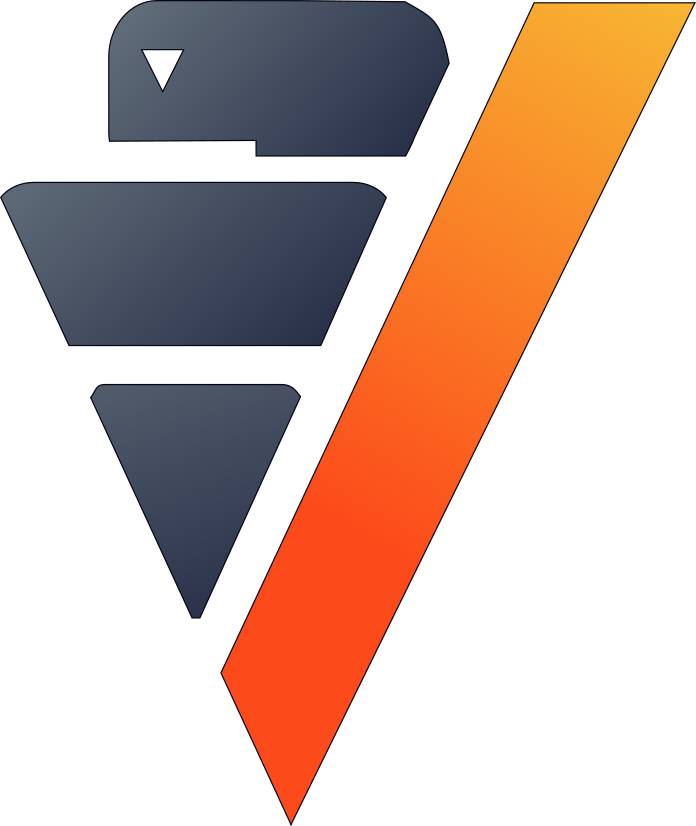

In [3]:
sm_consumption_weather = sm_consumption.join(
                            sm_weather,
                            how = "left",
                            on_interpolate = {"dateUTC": "dateUTC"},
                            expr1 = ["dateUTC", "meterID", "value"],
                            expr2 = ["humidity", "temperature"])
display(sm_consumption_weather)

The dataset 'sm_meters' is pretty important. In particular residence type can be a good predictor of electricity usage. We can also create clusters of the different regions with k-means clustering based on longitude and latitude. Let's find the most suitable 'k' using an elbow curve and scatter plot.

,min,max
"""meterID""",0.0,999.0
"""residenceType""",1.0,3.0
"""latitude""",51.7964600770212,54.0270361317983
"""longitude""",-9.16352332036362,-6.07134572494937

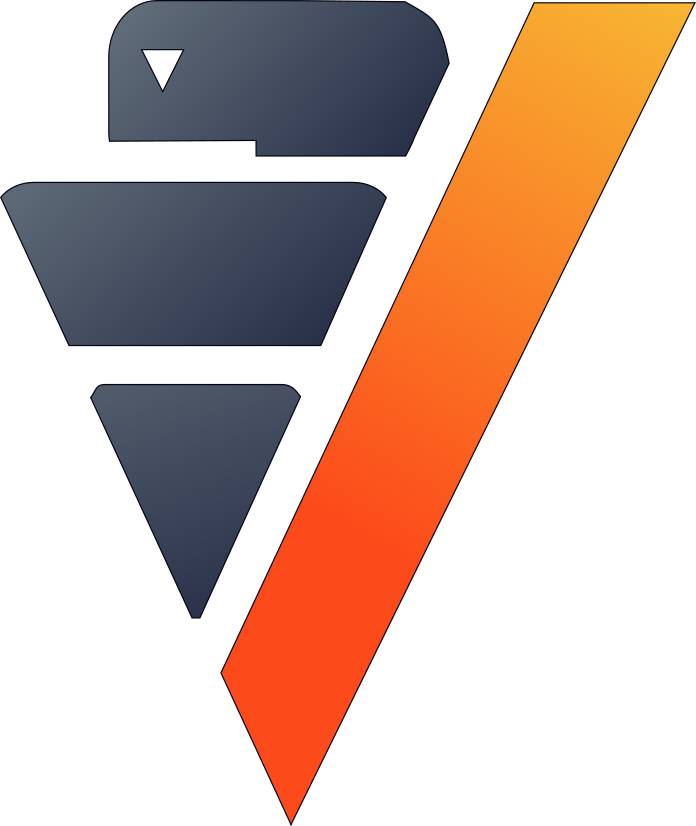

In [4]:
sm_meters.agg(["min", "max"])

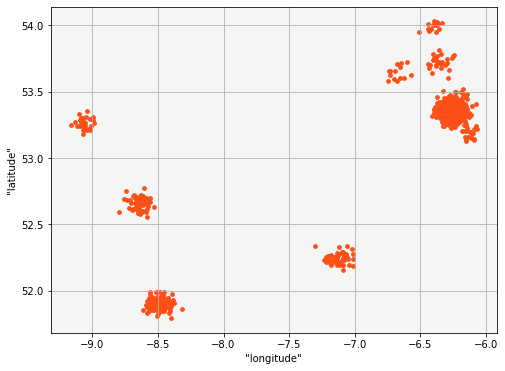

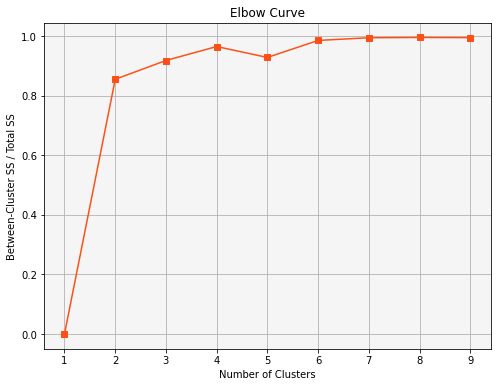

In [5]:
%matplotlib inline
from verticapy.learn.model_selection import elbow
sm_meters.scatter(["longitude", "latitude"])
x = elbow(sm_meters, ["longitude", "latitude"], n_cluster = (1, 10))

Based on the elbow curve and scatter plot, 6 seems like the optimal number of clusters, so let's create a k-means model with 6 clusters.

In [6]:
from verticapy.learn.cluster import KMeans
model = KMeans("kmeans_sm_regions", n_cluster = 6)
model.drop()
model.fit(sm_meters, ["longitude", "latitude"])



centers
longitude|latitude
---------+--------
-8.48641 |51.90216
-6.26980 |53.38127
-7.12408 |52.24610
-9.06178 |53.25998
-8.64152 |52.61065
-8.63880 |52.69012


metrics
Evaluation metrics:
     Total Sum of Squares: 1209.2077
     Within-Cluster Sum of Squares: 
         Cluster 0: 0.53464463
         Cluster 1: 17.892423
         Cluster 2: 0.2657853
         Cluster 3: 0.099754154
         Cluster 4: 0.077581788
         Cluster 5: 0.11490845
     Total Within-Cluster Sum of Squares: 18.985097
     Between-Cluster Sum of Squares: 1190.2226
     Between-Cluster SS / Total SS: 98.43%
 Number of iterations performed: 3
 Converged: True
 Call:
kmeans('public.kmeans_sm_regions', '"public"._VERTICAPY_TEMPORARY_VIEW_dbadmin_47772', '"longitude", "latitude"', 6
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', distance_method='euclidean')

Let's add our clusters to our vDataFrame.

,123meterIDInt,123residenceTypeInt,🌎latitudeFloat,🌎longitudeFloat,123regionInteger
1,0,1,53.3575915882838,-6.27554509198069,1
2,1,1,53.3130886440828,-6.21174062227953,1
3,2,1,53.322863954253,-6.25885396251447,1
4,3,3,51.895226209818,-8.54531304761961,0
5,4,1,53.6511753623331,-6.69348712237822,1
6,5,1,53.3262233045899,-6.31623713317817,1
7,6,3,53.3816401612885,-6.24222877491921,1
8,7,3,53.4410265504271,-6.2749868845315,1
9,8,1,53.2883538726462,-6.31547263281076,1
10,9,1,53.307294775666,-6.171585396401,1

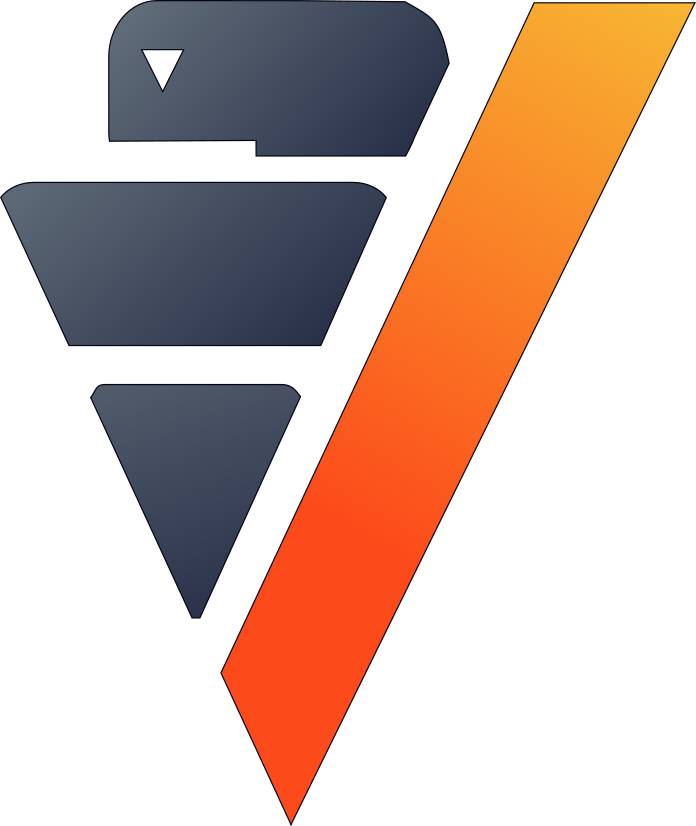

In [7]:
model.predict(sm_meters, name = "region")

Let's draw a scatter plot of the different regions.

<AxesSubplot:xlabel='"longitude"', ylabel='"latitude"'>

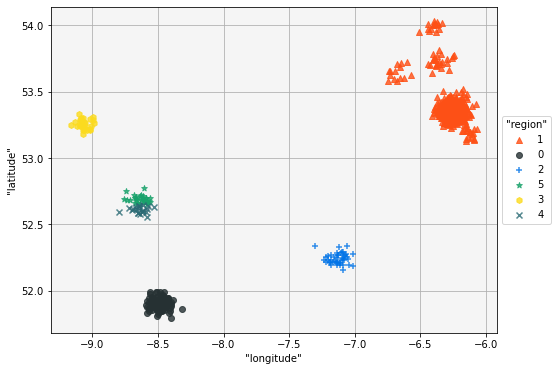

In [8]:
sm_meters.scatter(["longitude", "latitude"], 
                  catcol = "region",
                  max_cardinality = 10 
                 )

Let's join 'sm_meters' with 'sm_consumption_weather'.

,📅dateUTCTimestamp,123meterIDInt,"123valueNumeric(10,6)","123humidityNumeric(11,6)","123temperatureNumeric(10,6)",123residenceTypeInt,123regionInt
1,2014-01-01 00:00:00,913,0.097,95.0,38.0,3,1
2,2014-01-01 00:00:00,895,0.184,95.0,38.0,1,1
3,2014-01-01 00:00:00,795,0.093,95.0,38.0,1,1
4,2014-01-01 00:00:00,780,0.116,95.0,38.0,1,1
5,2014-01-01 00:00:00,747,0.559,95.0,38.0,2,1
6,2014-01-01 00:00:00,660,0.836,95.0,38.0,1,1
7,2014-01-01 00:00:00,640,1.796,95.0,38.0,1,4
8,2014-01-01 00:00:00,605,0.038,95.0,38.0,3,5
9,2014-01-01 00:00:00,484,0.211,95.0,38.0,1,1
10,2014-01-01 00:00:00,474,0.313,95.0,38.0,2,0

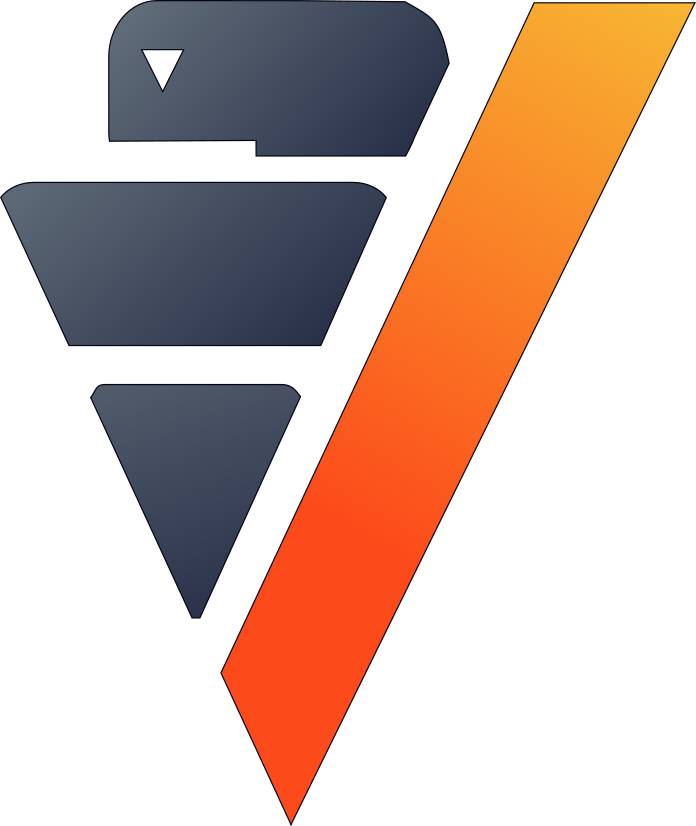

In [9]:
sm_consumption_weather_region = sm_consumption_weather.join(
                                    sm_meters,
                                    how = "natural",
                                    expr1 = ["*"],
                                    expr2 = ["residenceType", 
                                             "region"])
display(sm_consumption_weather_region)

Let's look at the missing values.

,count,percent
"""dateUTC""",1188432.0,100.0
"""meterID""",1188432.0,100.0
"""humidity""",1188432.0,100.0
"""temperature""",1188432.0,100.0
"""residenceType""",1188432.0,100.0
"""region""",1188432.0,100.0
"""value""",1188412.0,99.998

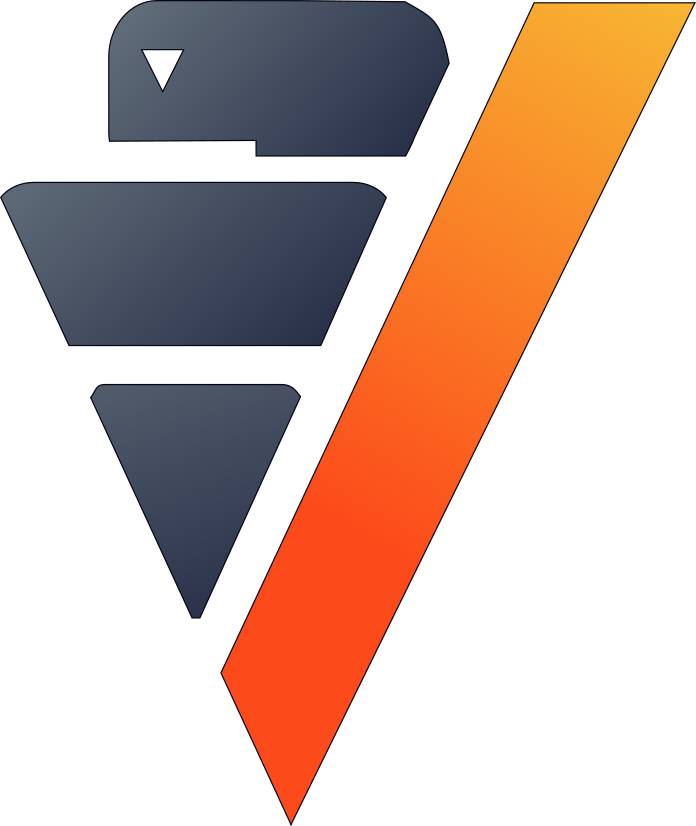

In [10]:
sm_consumption_weather_region.count()

The variable 'value' has a few missing values that we can drop.

20 elements were filtered.


,📅dateUTCTimestamp,123meterIDInt,"123valueNumeric(10,6)","123humidityNumeric(11,6)","123temperatureNumeric(10,6)",123residenceTypeInt,123regionInt
1,2014-01-01 00:00:00,913,0.097,95.0,38.0,3,1
2,2014-01-01 00:00:00,895,0.184,95.0,38.0,1,1
3,2014-01-01 00:00:00,795,0.093,95.0,38.0,1,1
4,2014-01-01 00:00:00,780,0.116,95.0,38.0,1,1
5,2014-01-01 00:00:00,747,0.559,95.0,38.0,2,1
6,2014-01-01 00:00:00,660,0.836,95.0,38.0,1,1
7,2014-01-01 00:00:00,640,1.796,95.0,38.0,1,4
8,2014-01-01 00:00:00,605,0.038,95.0,38.0,3,5
9,2014-01-01 00:00:00,484,0.211,95.0,38.0,1,1
10,2014-01-01 00:00:00,474,0.313,95.0,38.0,2,0

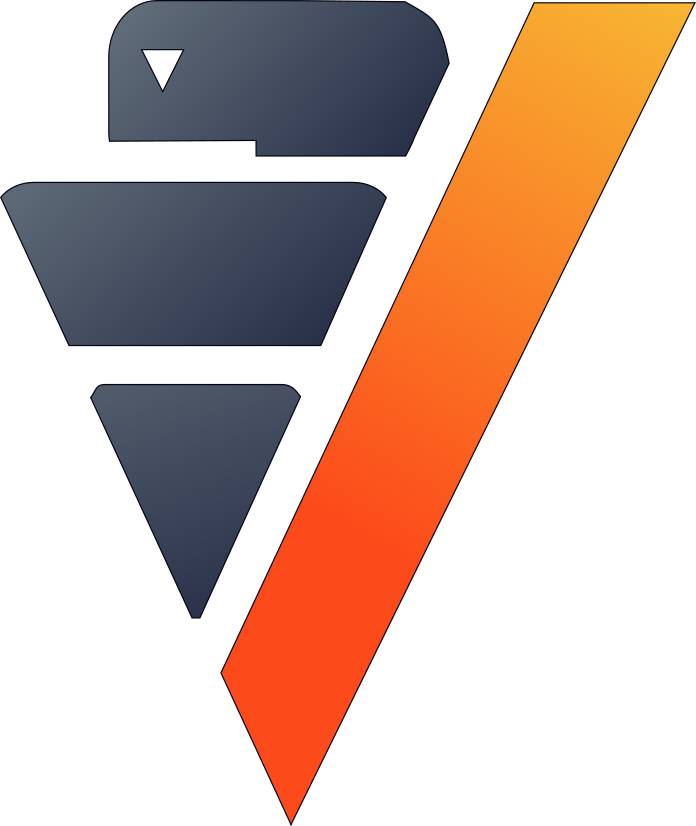

In [11]:
sm_consumption_weather_region["value"].dropna()

General Power Failure is happening most of the time per area. That's why, a good idea could be to get the average consumption per region.

In [12]:
sm_consumption_weather_region = sm_consumption_weather_region.groupby(
                    columns = ["region", 
                               "residenceType", 
                               "dateUTC"],
                    expr = [st.avg(sm_consumption_weather_region["value"])._as("avg_value"),
                            st.avg(sm_consumption_weather_region["temperature"])._as("temperature"),
                            st.avg(sm_consumption_weather_region["humidity"])._as("humidity")])

A natural idea is to compute the cumulative sum of the electricity consumption of each region and residence type.

,123regionInt,123residenceTypeInt,📅dateUTCTimestamp,123avg_valueFloat,123temperatureFloat,123humidityFloat,123cum_valueFloat
1,0,1,2014-01-01 00:00:00,0.152,38.0,95.0,0.152
2,0,1,2014-01-01 00:30:00,0.287,37.4,93.0,0.439
3,0,1,2014-01-01 01:00:00,0.29,37.4,100.0,0.729
4,0,1,2014-01-01 01:15:00,0.241,37.4,100.0,0.97
5,0,1,2014-01-01 01:30:00,0.039,37.4,100.0,1.009
6,0,1,2014-01-01 02:00:00,0.202,39.2,93.0,1.211
7,0,1,2014-01-01 02:15:00,1.373,39.2,93.0,2.584
8,0,1,2014-01-01 02:30:00,0.046,39.2,93.0,2.63
9,0,1,2014-01-01 03:15:00,0.072,39.2,93.0,2.702
10,0,1,2014-01-01 03:30:00,0.4665,39.2,93.0,3.1685

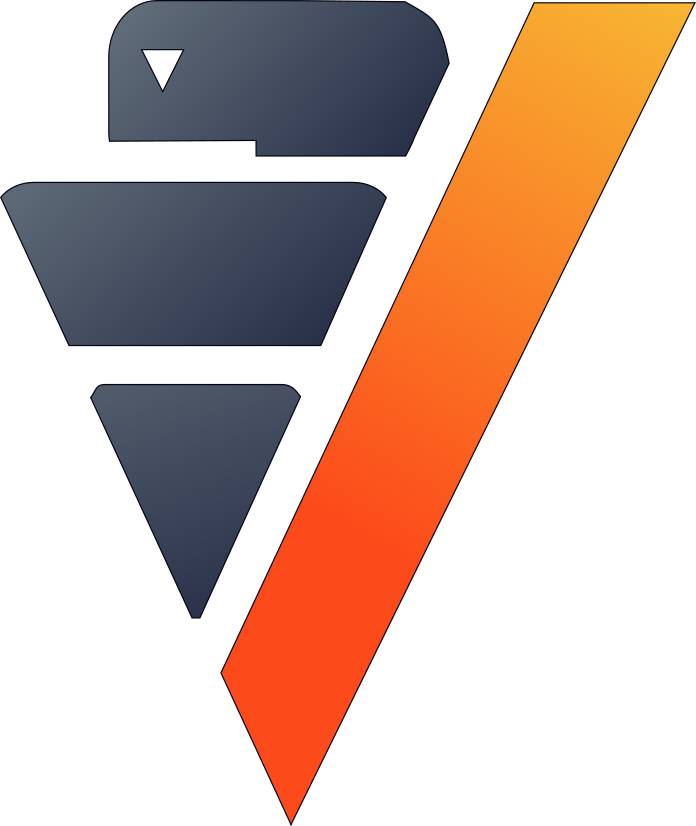

In [13]:
sm_consumption_weather_region.cumsum(column = "avg_value",
                                     by = ["region", "residenceType"],
                                     order_by = ["dateUTC"],
                                     name = "cum_value")

The linearity should be clearly visible.

<AxesSubplot:xlabel='"dateUTC"', ylabel='"cum_value"'>

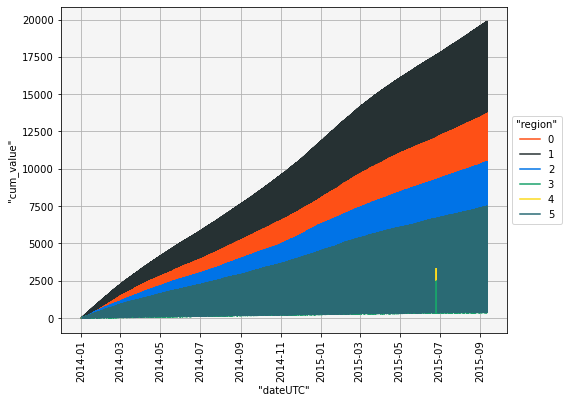

In [14]:
sm_consumption_weather_region["cum_value"].plot(ts = "dateUTC",
                                                by = "region")

We have the opportunity to create a lot of useful features. For example, we can create dummies of the categorical features, extract the year quarter, and compute the elapsed time.

In [15]:
sm_consumption_weather_region["quarter"] = st.quarter(sm_consumption_weather_region["dateUTC"])
sm_consumption_weather_region.get_dummies(columns = ["residenceType",
                                                     "region",
                                                     "quarter"],
                                          max_cardinality = 20,
                                          drop_first = False)
sm_consumption_weather_region["elapsed_time"] = (sm_consumption_weather_region["dateUTC"] - st.min(
                                                sm_consumption_weather_region["dateUTC"])._over()) / st.interval("1 minute")

We can look at the correlation between our response and the predictors.

,"""cum_value"""
"""cum_value""",1.0
"""elapsed_time""",0.719
"""region_1""",0.467
"""region""",-0.37
"""region_3""",-0.216
"""region_4""",-0.215
"""region_5""",-0.209
"""quarter_1""",-0.198
"""region_2""",-0.165
"""quarter_3""",0.165

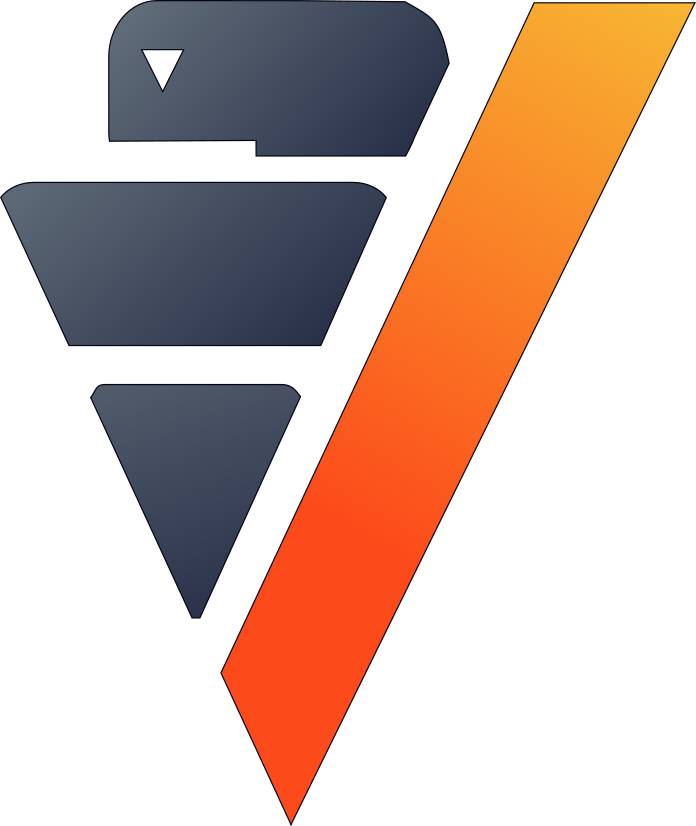

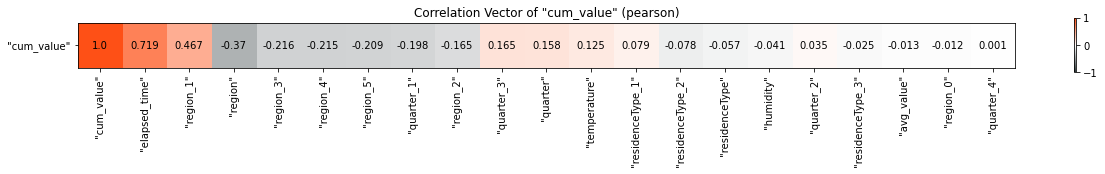

In [16]:
sm_consumption_weather_region.corr(focus = "cum_value")

We can see a very high correlation between the cumulative sum and the elapsed time. Some other features are also correlated, like quarter_1, quarter_3, and temperature.

## Machine Learning

Let's create our model.

In [17]:
from verticapy.utilities import *
create_verticapy_schema()

,explained_variance,max_error,median_absolute_error,mean_absolute_error,mean_squared_error,r2
1-fold,0.516349265576552,12389.1560878129,1981.90550585853,2732.21902288687,12606323.1584611,0.516341002730916
2-fold,0.516704906592645,12341.2433673016,2011.58599010466,2753.19983771567,12733945.0484673,0.516700197451028
3-fold,0.516398351689914,12364.7387747001,1987.06751486108,2742.36938916759,12680207.664784,0.516397238663737
avg,0.5164841746197036,12365.046076604867,1993.5196702747567,2742.59608325671,12673491.957237467,0.516479479615227
std,0.00019272860332647892,23.957838436386368,15.85734903389809,10.492244296509332,64075.44184846996,0.00019320427613170703

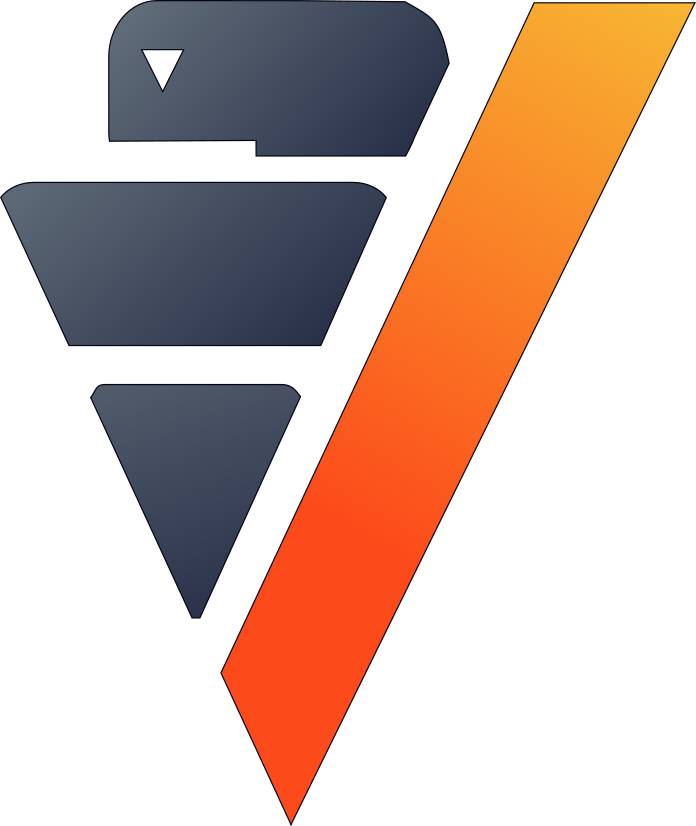

In [18]:
from verticapy.learn.linear_model import LinearRegression
from verticapy.learn.model_selection import cross_validate

predictors = ["elapsed_time",
              "quarter_1",
              "quarter_3",
              "temperature",
              "humidity"]
model = LinearRegression("sm_lr", solver = "BFGS")
model.drop()
cross_validate(model, sm_consumption_weather_region, predictors, "cum_value", cv = 3)

,importance,sign
elapsed_time,96.55,1
quarter_3,1.09,-1
quarter_1,1.0,1
humidity,0.78,-1
temperature,0.58,1

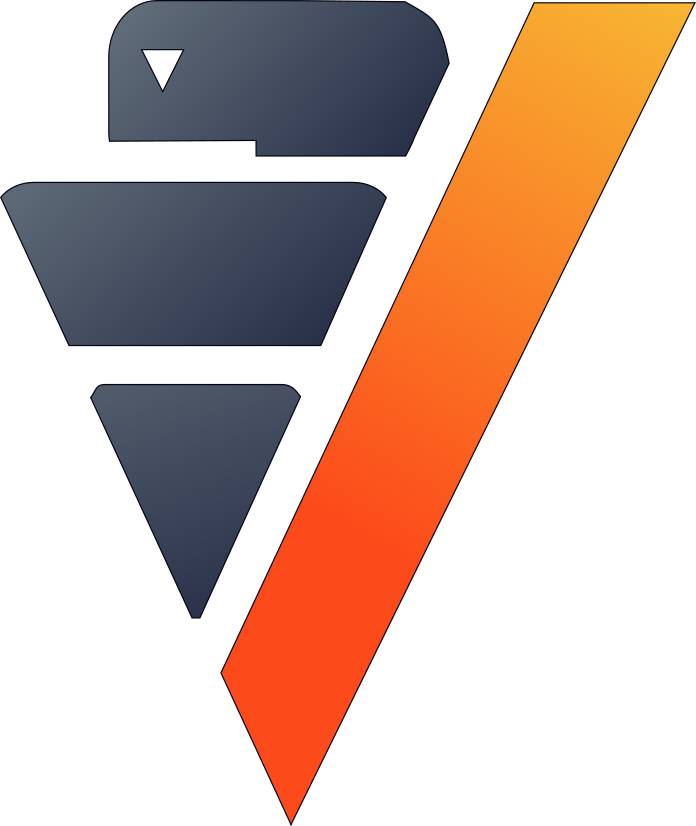

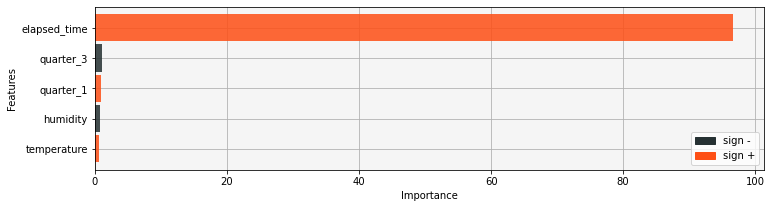

In [19]:
model.fit(sm_consumption_weather_region, 
          predictors,
          "cum_value").features_importance()

Our model is excellent. We can make predictions about the energy consumption of households per region. If the usage exceeds what the model predicts, we can raise an alert and regulate the distributed electricity per region.

In [20]:
from verticapy.utilities import *
drop_verticapy_schema()

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!